In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf

In [2]:
class TemplateEnough(maf.BaseMetric):
    """How many years do we have n-templates?
    """
    def __init__(self, n_needed=5, time_limit=365.25,
                 mjd_col="observationStartMJD",
                 metric_name="TemplateExistsMetric",
                 frac=True, years=10., **kwargs):
        # XXX--need an SNR cut as well
        self.n_needed = n_needed
        cols = [mjd_col]
        super(TemplateEnough, self).__init__(
            col=cols, metric_name=metric_name, units="N", **kwargs
        )
        self.mjd_col = mjd_col
        self.time_limit=time_limit
        self.years = years
        
    def run(self, data_slice, slice_point=None):
        data_slice.sort(order=self.mjd_col)
        
        bins = np.arange(self.years+1)*self.time_limit + data_slice[self.mjd_col].min()
        counts, bins = np.histogram(data_slice[self.mjd_col], bins=bins)
        n_with_templates = np.where(counts >= self.n_needed)[0].size
        
        return n_with_templates

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


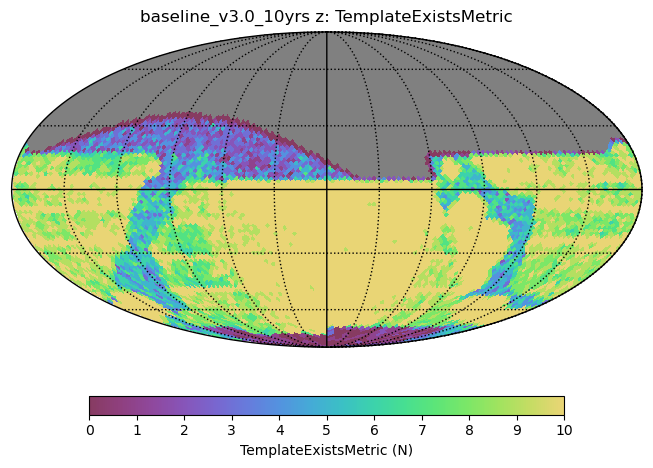

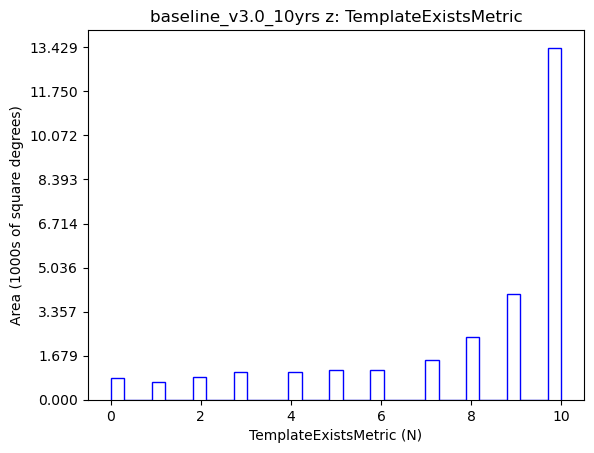

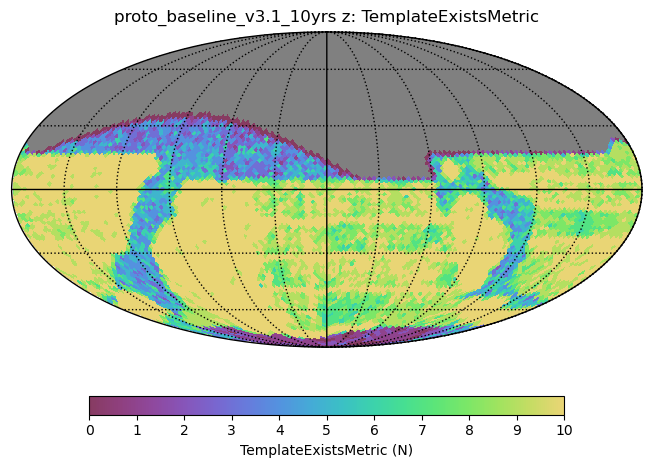

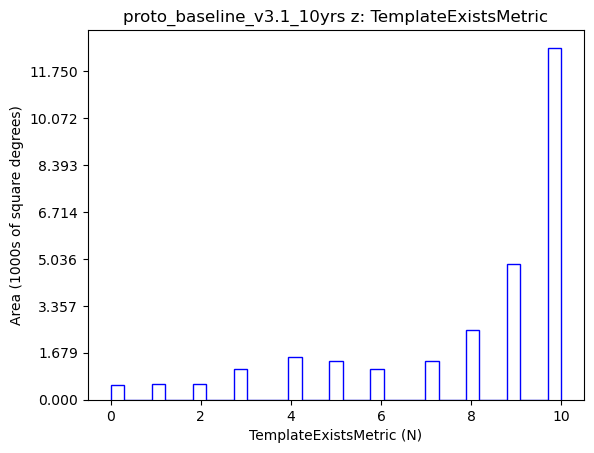

In [3]:
for filename in ['baseline_v3.0_10yrs.db', 'proto_baseline_v3.1_10yrs.db']:

    run_name = filename.replace('.db', '')

    slicer = maf.HealpixSlicer(nside=32)
    metric = TemplateEnough()

    sql = 'filter="z"'

    bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name)]
    bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
    bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
    bg.run_all()
    bg.plot_all(closefigs=False)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


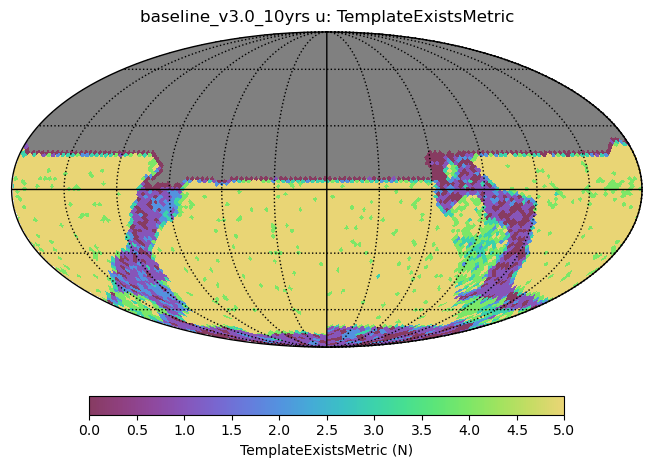

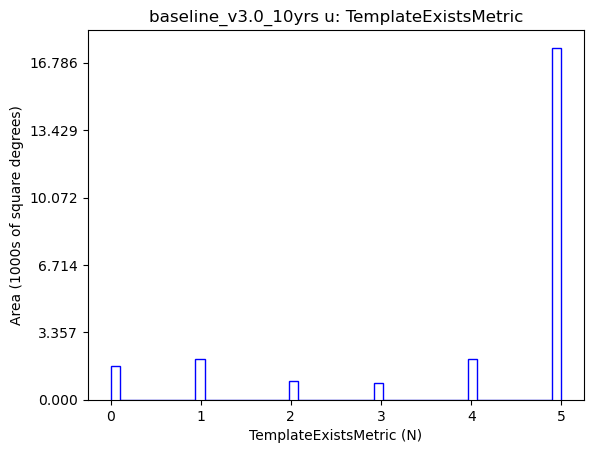

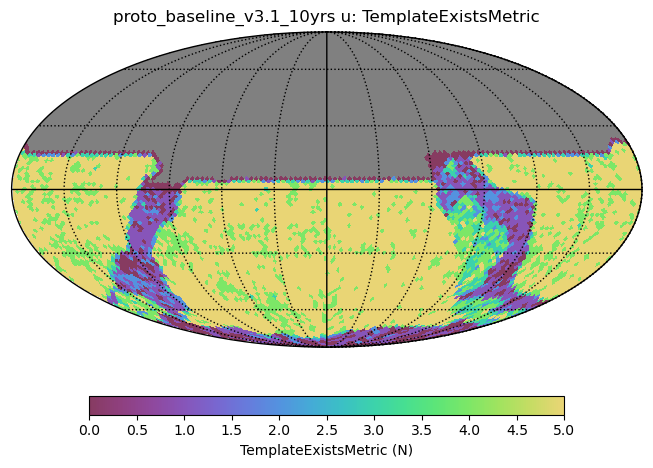

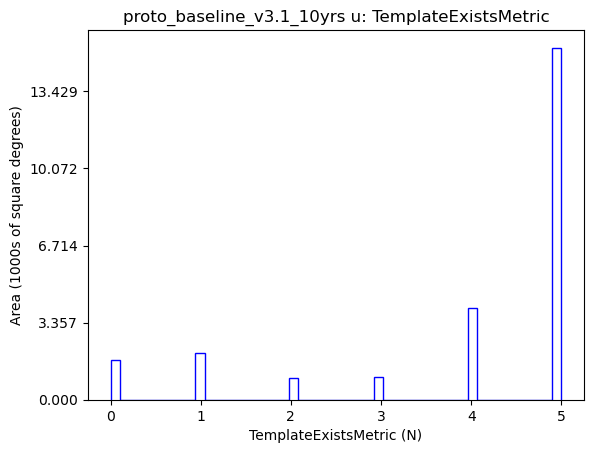

In [7]:
for filename in ['baseline_v3.0_10yrs.db', 'proto_baseline_v3.1_10yrs.db']:

    run_name = filename.replace('.db', '')

    slicer = maf.HealpixSlicer(nside=32)
    metric = TemplateEnough(time_limit=365.25*2)

    sql = 'filter="u"'

    bundle_list = [maf.MetricBundle(metric, slicer, sql, run_name=run_name)]
    bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
    bg = maf.MetricBundleGroup(bundle_dict, filename, out_dir='temp',results_db=None)
    bg.run_all()
    bg.plot_all(closefigs=False)